In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD

In [4]:
from keras.datasets import cifar100

In [4]:
# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

In [5]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 655s 4us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
from keras.utils import to_categorical
y_train_bin = to_categorical(y_train, 100)
y_test_bin = to_categorical(y_test, 100)

In [9]:
y_train_bin.shape

(50000, 100)

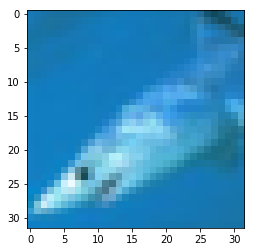

In [11]:
# need to move 
X_image = x_train[50]

plt.imshow(X_image)

In [12]:
y_train[50]

array([73])

In [19]:
X_train.shape

(50000, 32, 32, 3)

### MLP

In [14]:
input_shape = x_train.shape[1:]
num_classes = y_train_bin.shape[1:]
num_classes = num_classes[0]

In [15]:
model = Sequential()

model.add(Flatten(input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                196672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)      

In [16]:
history = model.fit(x_train, y_train_bin,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test_bin))
score = model.evaluate(x_test, y_test_bin, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 290us/step - loss: 15.9555 - acc: 0.0101 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 2/10
50000/50000 [==============================] - 14s 275us/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 3/10
50000/50000 [==============================] - 14s 282us/step - loss: 15.9572 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 4/10
50000/50000 [==============================] - 15s 301us/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 5/10
50000/50000 [==============================] - 17s 342us/step - loss: 15.9566 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 6/10
50000/50000 [==============================] - 15s 298us/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 7/10
50000/50000 [==============================] 

### CNN

In [17]:
num_classes = y_train_bin.shape[1:][0]
num_epochs = 5
batchsize = 128

In [19]:
# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=x_train.shape[1:],
                 data_format='channels_last',
                padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',
                padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',
                padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu',
                padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               4194432   
__________

In [20]:
model.fit(x_train, y_train_bin,
          batch_size=batchsize,
          epochs=num_epochs,
          verbose=1,
          validation_data=(x_test, y_test_bin))
score = model.evaluate(x_test, y_test_bin, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 1201s 24ms/step - loss: 15.9550 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 2/5
50000/50000 [==============================] - 1212s 24ms/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 3/5
50000/50000 [==============================] - 1282s 26ms/step - loss: 15.9575 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 4/5
50000/50000 [==============================] - 1456s 29ms/step - loss: 15.9566 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 5/5
50000/50000 [==============================] - 1291s 26ms/step - loss: 15.9572 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Test loss: 15.95691436767578
Test accuracy: 0.01


### External model to check CNN - issue with data ingestion

In [47]:
batch_size = 128
# building model with too many classes inially for simpler transfer learning afterwards
nb_classes = 20
nb_epoch = 12

# input image dimensions
_, img_channels, img_rows, img_cols = X_train.shape

# # convert class vectors to binary class matrices
# Y_train = np_utils.to_categorical(y_train, nb_classes)
# Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols),
                activation='relu'))
# model.add(Activation('relu'))
model.add(Conv2D(32, 3, 3, 
                 activation='relu'))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, 3, border_mode='same',
                activation='relu'))
# model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3,
                activation='relu'))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, 
               activation='relu'))
# model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,
               activation='softmax'))
# model.add(Activation('softmax'))

# let's train the model using SGD + momentum (how original).
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, y_train_bin, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, y_test_bin))
score = model.evaluate(X_test, y_test_bin, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


Instructions for updating:
Use tf.cast instead.


c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 234s 5ms/step - loss: 15.3177 - acc: 0.0495 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 2/12
50000/50000 [==============================] - 241s 5ms/step - loss: 15.3025 - acc: 0.0506 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 3/12
50000/50000 [==============================] - 223s 4ms/step - loss: 15.3122 - acc: 0.0500 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 4/12
50000/50000 [==============================] - 223s 4ms/step - loss: 15.3122 - acc: 0.0500 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 5/12
50000/50000 [==============================] - 233s 5ms/step - loss: 15.3122 - acc: 0.0500 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 6/12
50000/50000 [==============================] - 239s 5ms/step - loss: 15.3122 - acc: 0.0500 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 7/12
50000/50000 [==============================] - 239s 5ms/step - loss: 15.3122 - acc: 0.0500 - val_lo

TypeError: evaluate() got an unexpected keyword argument 'show_accuracy'